# Known Website Data Analytics


Larger corporations are increasingly looking to statistics like search engine trends,
assessing customer critical mass geolocation, and delivering personalized goods
based on social media picture analysis as they battle for market share in the beauty
field. Companies are gathering real-time product pricing in order to implement
dynamic strategies that allow them to provide competitive bargains to value
shoppers or customised pricing for specific demographics, particularly in emerging
nations where price can be a decisive factor for cash-strapped customers.

# Import Required Libraries

In [194]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
!pip install pingouin
import pingouin as pg
import plotly.express as px
import scipy.stats as stats
import sklearn as sk
import plotly.express as px
from wordcloud import WordCloud
!pip install statsmodels
import statsmodels.stats.multitest as sm

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# Data Preprocessing


The data set consists of 9,168 entries and contains 11 columns.
All columns have no blank values.
Numerical attributes such as 'Product Rating', 'Number of reviews', 'Number of people liked product' and 'Price' have reasonable statistics.
The data types for the columns seem appropriate.

In [195]:
# Read data set
website = pd.read_csv("Known_Website_data.csv")
website.head(15)

,Product ID,Brand Name,Category of Product,Product Name,Product Size,Product Rating,Number of reviews,Number of people liked product,Price,Kind of Marketing Flag,Options of Products
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,online only,no options
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,online only,no options
5,1417609,Acqua Di Parma,Perfume,Fico di Amalfi,5 oz/ 148 mL,4.5,79,2600,180.0,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...
6,1638832,Acqua Di Parma,Perfume,Rosa Nobile,3.4 oz/ 101 mL,4.5,79,5000,210.0,online only,"- 0.7 oz, 20 mL Eau de Parfum Spray - 1.7 oz/..."
7,1284462,Acqua Di Parma,Cologne,Colonia Essenza,1.7 oz/ 50 mL,5.0,13,719,120.0,online only,- 1.7 oz/ 50 mL Eau de Cologne Spray - 3.4 o...
8,2221588,Acqua Di Parma,Body Mist & Hair Mist,Peonia Nobile Hair Mist,1.7oz/50mL,4.0,5,800,58.0,online only,- 1.7oz/50mL Hair Mist - 0.70oz/20mL Eau de...
9,2221596,Acqua Di Parma,Perfume,Rosa Nobile Hair Mist,1.7oz/50mL,3.0,5,2100,58.0,exclusive · online only,- 1.7oz/50mL Hair Mist


## Overview

In [196]:
# Examine the general structure of the data set
print("General structure of the data set:")
print(website.info())

# Detect incorrect, contradictory or abnormal values in the data set
print("\nBasic statistics of numeric variables in the data set:")
print(website.describe())

General structure of the data set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Product ID                      9168 non-null   int64  
 1   Brand Name                      9168 non-null   object 
 2   Category of Product             9168 non-null   object 
 3   Product Name                    9168 non-null   object 
 4   Product Size                    9168 non-null   object 
 5   Product Rating                  9168 non-null   float64
 6   Number of reviews               9168 non-null   int64  
 7   Number of people liked product  9168 non-null   int64  
 8   Price                           9168 non-null   float64
 9   Kind of Marketing Flag          9168 non-null   object 
 10  Options of Products             9168 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 788.0+ KB
N

# Visualisations

Visualisations such as scatter plots and pair plots are useful for understanding the data.
A scatter plot showing the relationship between product score and number of reviews provides insight into customer interaction.
Boxplot for outlier analysis by category is a good application.

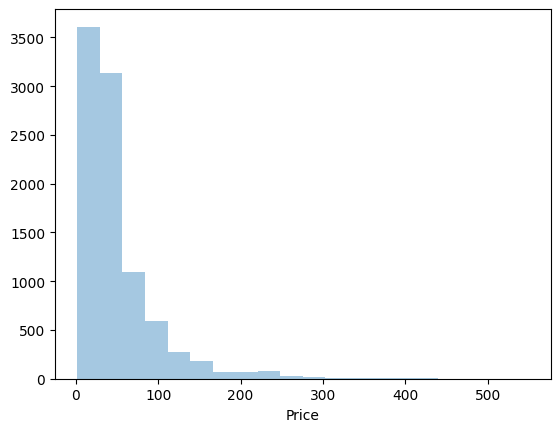

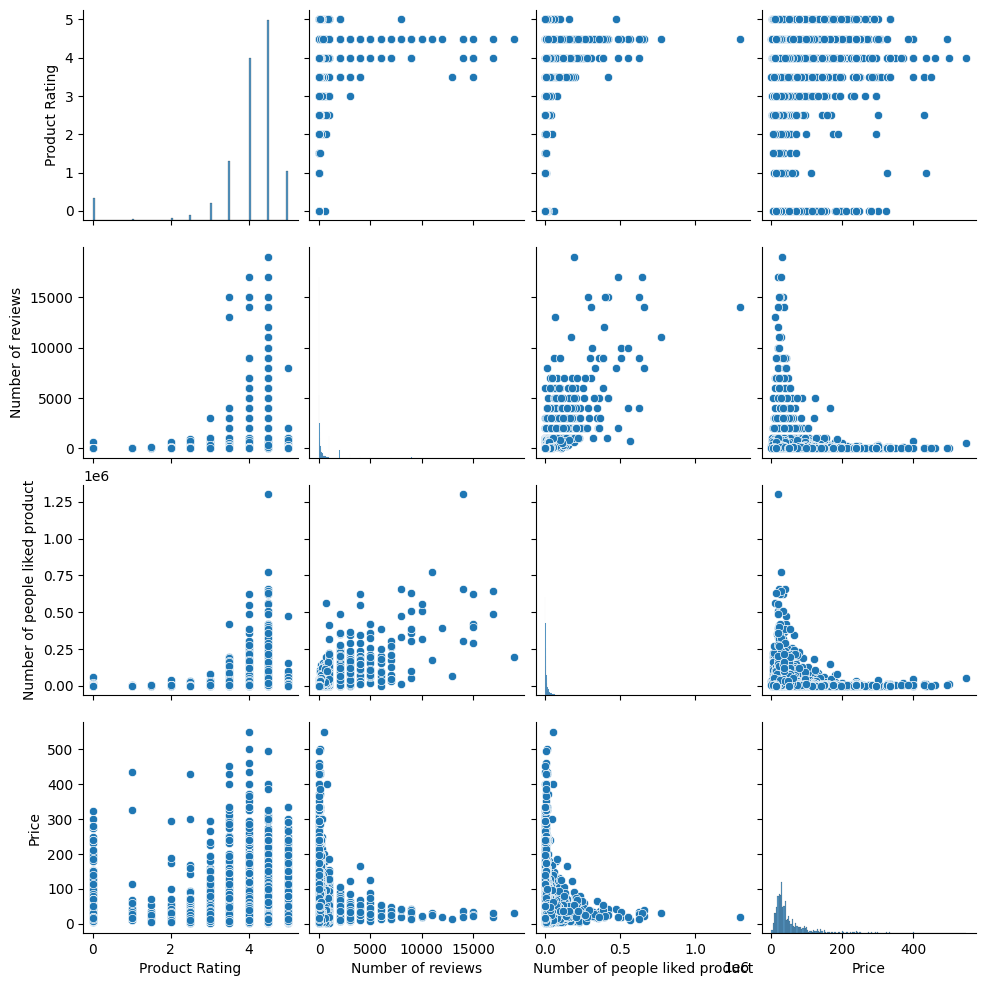

In [197]:
# Visualisations to see the distributions and relationships of variables in the data set.
sns.distplot(website["Price"], kde=False, bins=20) # show the distribution of product prices
sns.pairplot(website[["Product Rating", "Number of reviews", "Number of people liked product", "Price"]]) # show relationships between numeric variables


### Analysis of Categorical Variables

<AxesSubplot: xlabel='Price', ylabel='Category of Product'>

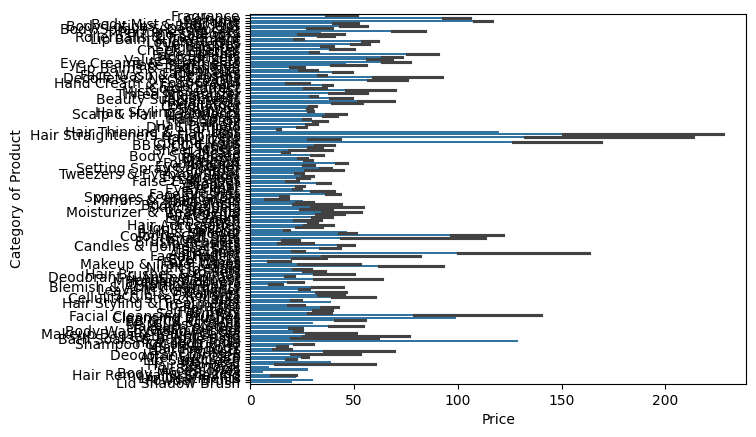

In [224]:
# To see the frequencies and effects of categorical variables in the data set
website["Category of Product"].value_counts() # show frequencies of product categories
sns.barplot(x="Price", y="Category of Product", data=website) # show average prices of product categories


# Model Geliştirme, Eğitme, Değerlendirme

### Correlation and Regression Analysis

Various regression models (Random Forest, Gradient Boosting, Decision Tree, Linear Regression, Lasso, Ridge, SVR, KNN, AdaBoost) were applied to predict product prices.
Random Forest has the highest R-squared value, indicating that it performs better among the models.
Linear Regression seems to perform poorly with an extremely low R-square value.
Some models such as AdaBoost have negative R-squared values, indicating that it may not be suitable for this data set.

In [259]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Models
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
tree_model = DecisionTreeRegressor(random_state=42)
lr_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()
svr_model = SVR()
knn_model = KNeighborsRegressor()
ada_model = AdaBoostRegressor(random_state=42)

# Training of models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
ada_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_svr = svr_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_ada = ada_model.predict(X_test)

# Evaluation of R-squared values
r2_rf = r2_score(y_test, y_pred_rf)
r2_gb = r2_score(y_test, y_pred_gb)
r2_tree = r2_score(y_test, y_pred_tree)
r2_lr = r2_score(y_test, y_pred_lr)
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_svr = r2_score(y_test, y_pred_svr)
r2_knn = r2_score(y_test, y_pred_knn)
r2_ada = r2_score(y_test, y_pred_ada)

# Reflection of results
print("Random Forest Model R-square Value:", r2_rf)
print("Gradient Boosting Model R-square Value:", r2_gb)
print("Decision Tree Model R-square Value:", r2_tree)
print("Linear Regression Model R-square Value:", r2_lr)
print("Lasso Model R-square Value:", r2_lasso)
print("Ridge Model R-square Value:", r2_ridge)
print("SVR Model R-square Value:", r2_svr)
print("KNN Model R-square Value:", r2_knn)
print("AdaBoost Model R-square Value:", r2_ada)


Random Forest Model R-square Value: 0.6515851924971068
Gradient Boosting Model R-square Value: 0.5189358698862938
Decision Tree Model R-square Value: 0.5811098312457481
Linear Regression Model R-square Value: -9.252326455994148e+21
Lasso Model R-square Value: 0.16553609607632946
Ridge Model R-square Value: 0.6423071681479442
SVR Model R-square Value: 0.23868977425397553
KNN Model R-square Value: 0.5763454697748988
AdaBoost Model R-square Value: -3.9169667783265183


# **Evaluation of Result**

### According to the model results obtained, I can make the following evaluations:

**_Random Forest Model:_** This model has the highest R-square value (0.65), indicating that the variables in the data set are quite successful in explaining the product price. This model has the ability to make a strong prediction by combining multiple decision trees to address the complexity in the data set.

**_Gradient Boosting Model:_** This model, with an R-squared value of 0.52, explains some of the variance in the product price of the variables in the data set. Like Random Forest, this model improves its performance by creating a strong predictor from many weak predictors.

_**Decision Tree Model:**_ With an R-square value of 0.58, this model achieves an average success in explaining the product price of the variables in the data set. Like the Random Forest model, this model also works with a tree structure, but uses a single tree.

**_Linear Regression Model_**: The R-square value of this model is quite low (-9.25e+21), indicating that the model explains the data set very poorly. In this case, the linear regression model may not be appropriate for the data set.

**_Lasso Model:_** With an R-square value of 0.17, this model performs weaker than the other models. Lasso tries to eliminate unnecessary variables by feature selection.

**_Ridge Model_**: With an R-square value of 0.64, this model explains most of the variables in the data set. Ridge regression increases the generalisation ability of the model by reducing overlearning.

**_SVR Model:_** With an R-square value of 0.24, this support vector regression model exhibits a lower performance than the other models. In this case, it can be considered that the data set contains non-linear relationships.

**_KNN Model:_** With an R-square value of 0.58, this model achieves moderate success in explaining the product price of the variables in the data set. KNN makes predictions by combining similar examples.

**_AdaBoost Model:_** -3.92 R-square value is quite low and even negative. This indicates that the model fails to explain the data set and is perhaps not suitable for the data set.

As a result, it is seen that the Random Forest model shows the best performance. 

# Additional Testing, Analysis and Visualisations

### a scatter plot showing the relationship between product score and number of reviews

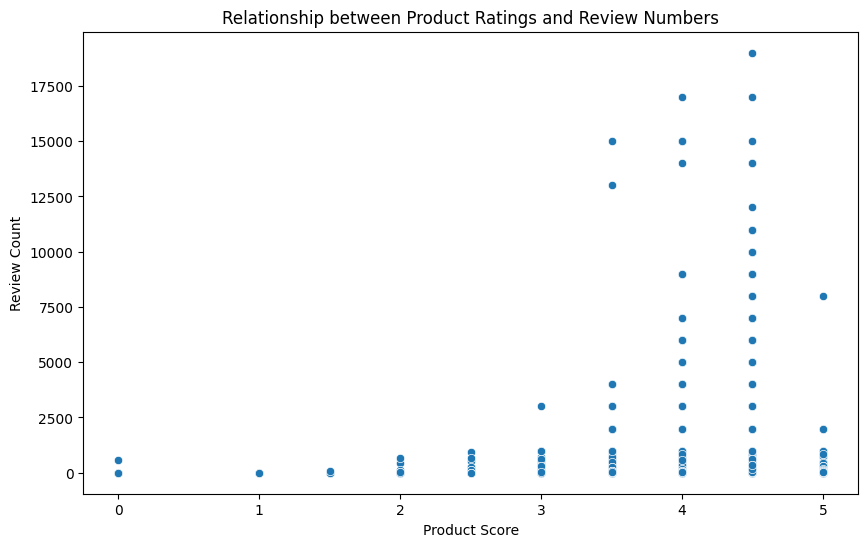

In [260]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Product Rating', y='Number of reviews', data=website)
plt.title('Relationship between Product Ratings and Review Numbers')
plt.xlabel('Product Score')
plt.ylabel('Review Count')
plt.show()

### Outlier Analysis

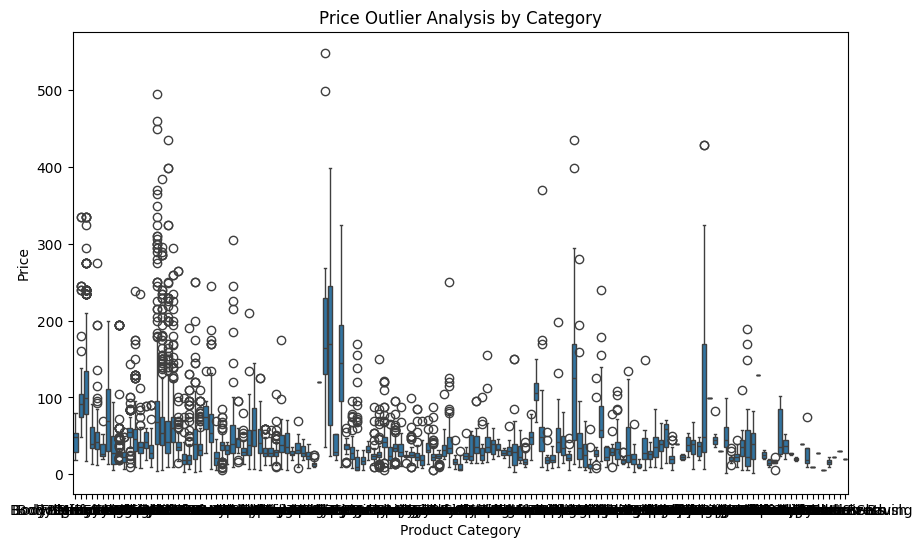

In [261]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category of Product', y='Price', data=website)
plt.title('Price Outlier Analysis by Category')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.show()


### Category Analysis

Most Popular Categories and Product Information:
        Category of Product  ...  Price
2                   Perfume  ...  180.0
3                   Perfume  ...  120.0
5                   Perfume  ...  180.0
6                   Perfume  ...  210.0
9                   Perfume  ...   58.0
...                     ...  ...    ...
9034      Value & Gift Sets  ...   25.0
9053           Moisturizers  ...   17.0
9078  Face Wash & Cleansers  ...   11.0
9102                Perfume  ...   17.0
9152  Face Wash & Cleansers  ...   15.0

[2125 rows x 4 columns]


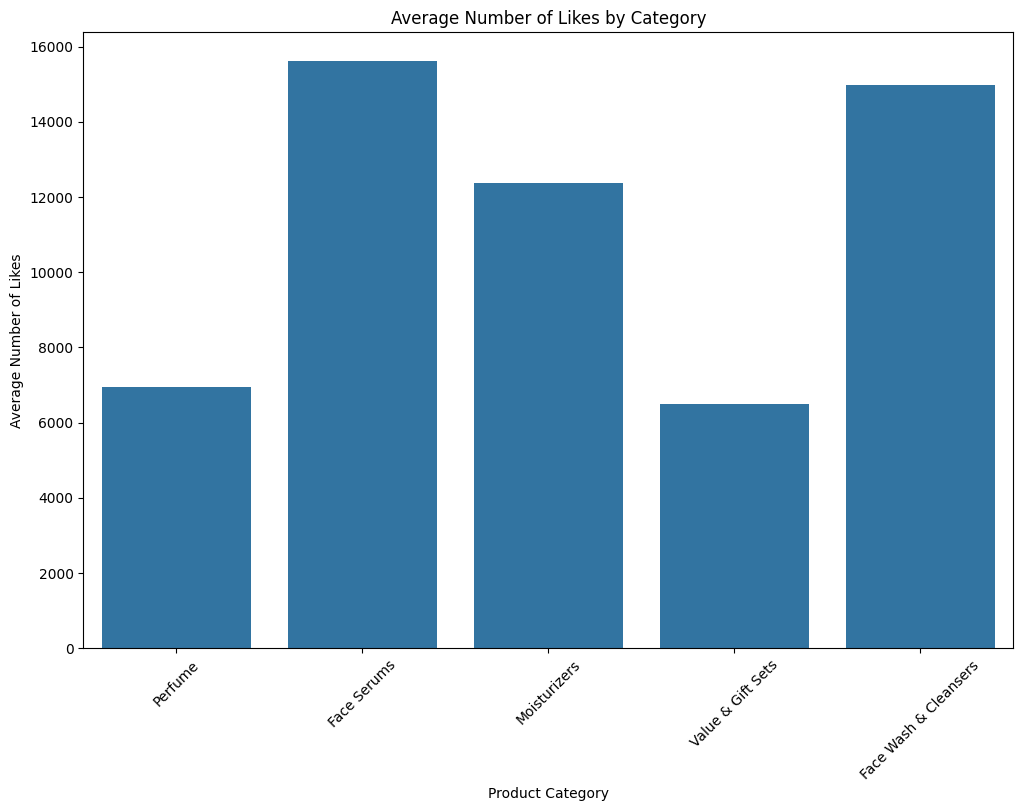

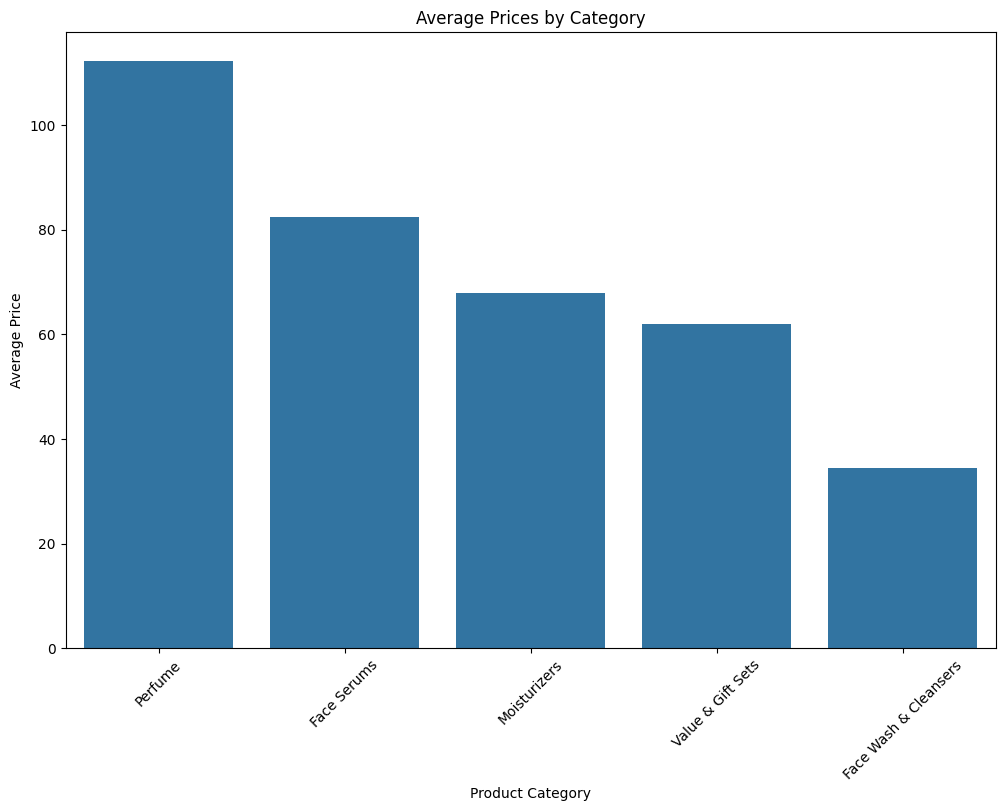

In [262]:
# Category Analysis
popular_categories = website['Category of Product'].value_counts().index[:5] # Top 5 most popular categories
popular_product = website.loc[website['Category of Product'].isin(popular_categories)] # Data for the most popular categories

# Show the most popular products and related information
print("Most Popular Categories and Product Information:")
print(popular_product[['Category of Product', 'Product Name', 'Number of people liked product', 'Price']])

# Comparison of number of likes and prices by category
plt.figure(figsize=(12, 8))
sns.barplot(x='Category of Product', y='Number of people liked product', data=popular_product, ci=None)
plt.title('Average Number of Likes by Category')
plt.xlabel('Product Category')
plt.ylabel('Average Number of Likes')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Category of Product', y='Price', data=popular_product, ci=None)
plt.title('Average Prices by Category')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

### ANOVA

In [263]:
# Evaluating the relationship between the number of likes and prices by category
pg.anova(data=popular_product, dv='Number of people liked product', between='Category of Product')

pg.pairwise_tukey(data=popular_product, dv='Number of people liked product', between='Category of Product')

# Evaluating the relationship between prices by category
pg.anova(data=popular_product, dv='Price', between='Category of Product')

pg.pairwise_tukey(data=popular_product, dv='Price', between='Category of Product')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Face Serums,Face Wash & Cleansers,82.475495,34.436721,48.038774,4.597464,10.448972,0.000000e+00,0.809611
1,Face Serums,Moisturizers,82.475495,67.838004,14.637490,3.913876,3.739896,1.767747e-03,0.232784
2,Face Serums,Perfume,82.475495,112.156391,-29.680896,3.612676,-8.215764,0.000000e+00,-0.470652
3,Face Serums,Value & Gift Sets,82.475495,61.878280,20.597214,4.083981,5.043416,4.920252e-06,0.303195
4,Face Wash & Cleansers,Moisturizers,34.436721,67.838004,-33.401284,4.461786,-7.486080,9.231504e-13,-0.797899
5,Face Wash & Cleansers,Perfume,34.436721,112.156391,-77.719670,4.200064,-18.504403,0.000000e+00,-1.621434
6,Face Wash & Cleansers,Value & Gift Sets,34.436721,61.878280,-27.441560,4.611725,-5.950390,3.117036e-08,-0.572116
7,Moisturizers,Perfume,67.838004,112.156391,-44.318387,3.438355,-12.889414,0.000000e+00,-0.830801
8,Moisturizers,Value & Gift Sets,67.838004,61.878280,5.959724,3.930618,1.516231,5.519562e-01,0.108118
9,Perfume,Value & Gift Sets,112.156391,61.878280,50.278111,3.630807,13.847640,0.000000e+00,0.881914


### Violin and Swarm Charts

The violin chart shows the distribution of the number of likes in a more organic and detailed way. The width of the graph represents the density of data in that category. Wider regions contain more data.

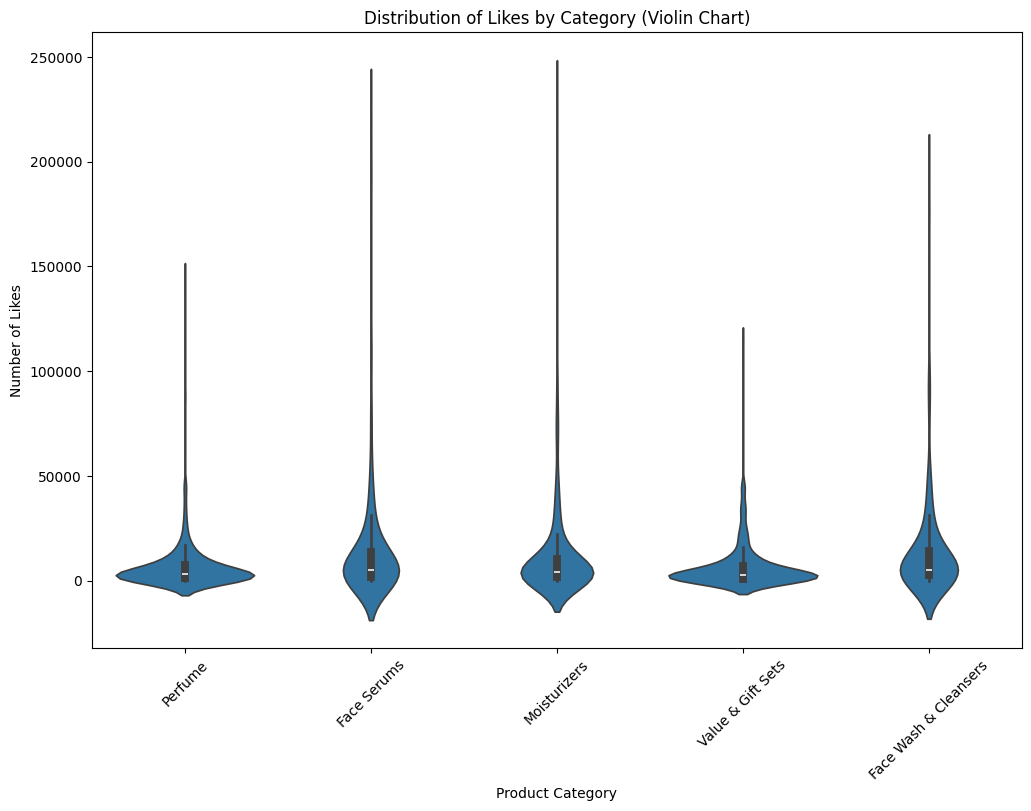

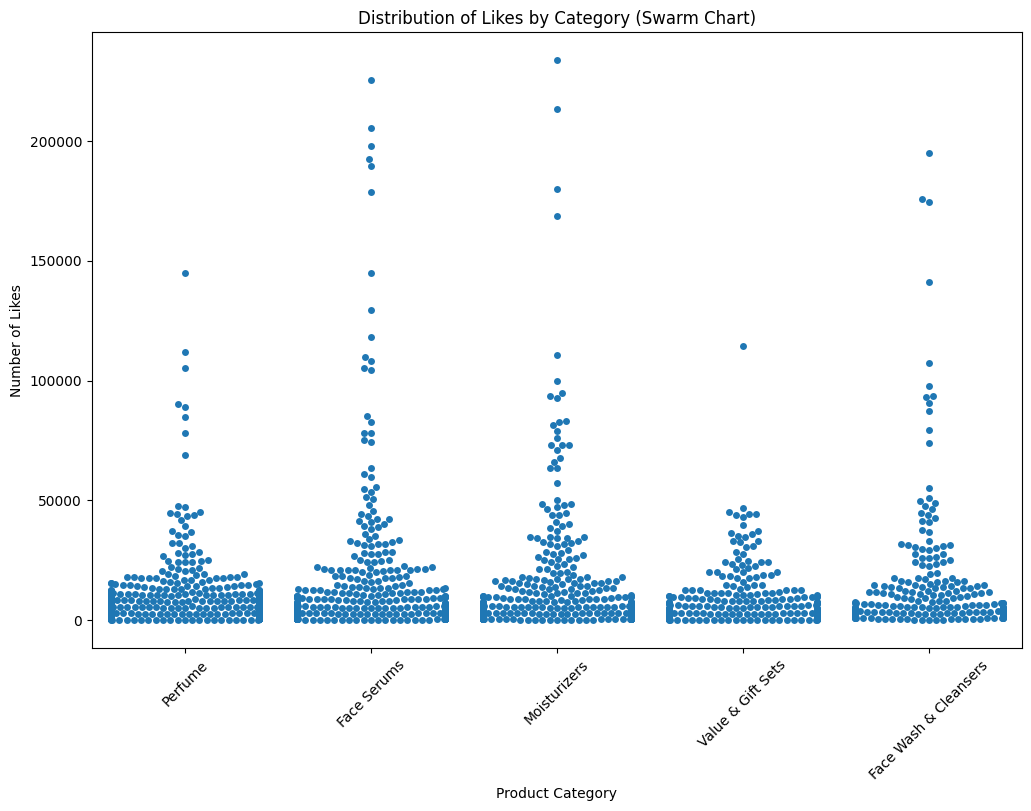

In [264]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Category of Product', y='Number of people liked product', data=popular_product)
plt.title('Distribution of Likes by Category (Violin Chart)')
plt.xlabel('Product Category')
plt.ylabel('Number of Likes')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.swarmplot(x='Category of Product', y='Number of people liked product', data=popular_product)
plt.title('Distribution of Likes by Category (Swarm Chart)')
plt.xlabel('Product Category')
plt.ylabel('Number of Likes')
plt.xticks(rotation=45)
plt.show()


### Product Name Analysis with Word Cloud

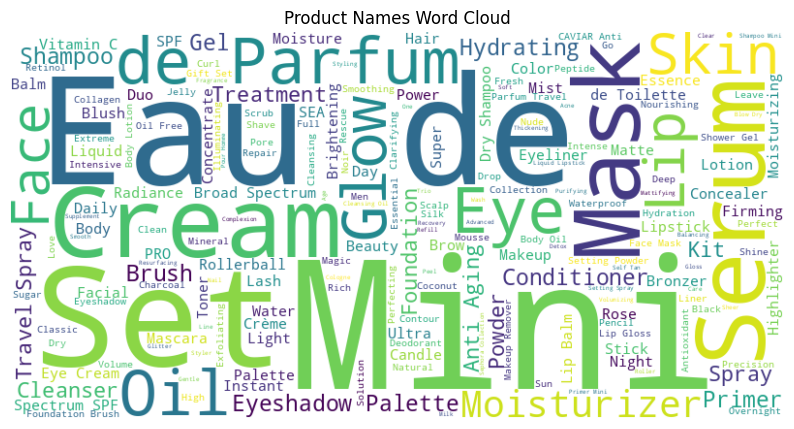

In [265]:
# Word Cloud creation sample code
product_names = ' '.join(website['Product Name'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(product_names)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Product Names Word Cloud')
plt.show()

### Marketing Strategy Analysis

In [266]:
# Sample code for marketing strategy analysis
marketing_counts = website['Kind of Marketing Flag'].value_counts()
print("Marketing Flag Counts:")
print(marketing_counts)

import plotly.express as px

# Interactive visualisation for marketing strategy analysis
fig = px.bar(marketing_counts, x=marketing_counts.index, y='Kind of Marketing Flag', labels={'Kind of Marketing Flag': 'Marketing Strategy', 'index': 'Number'})
fig.update_layout(title='Marketing Strategy Numbers', xaxis_title='Marketing Strategy', yaxis_title='Number')
fig.show()


Marketing Flag Counts:
0                                                   4786
exclusive                                           1692
online only                                         1528
exclusive · online only                              318
limited edition · exclusive                          297
limited edition                                      237
limited edition · online only                        188
limited edition · exclusive · online only            119
limited time offer                                     2
limited time offer · limited edition · exclusive       1
Name: Kind of Marketing Flag, dtype: int64


In [267]:
# To see the available column names
print(website.columns)

Index(['Product ID', 'Brand Name', 'Category of Product', 'Product Name',
       'Product Size', 'Product Rating', 'Number of reviews',
       'Number of people liked product', 'Price', 'Kind of Marketing Flag',
       'Options of Products', 'Cluster'],
      dtype='object')


### Sensitivity, Customer Segmentation, Cluster analysis Analysis

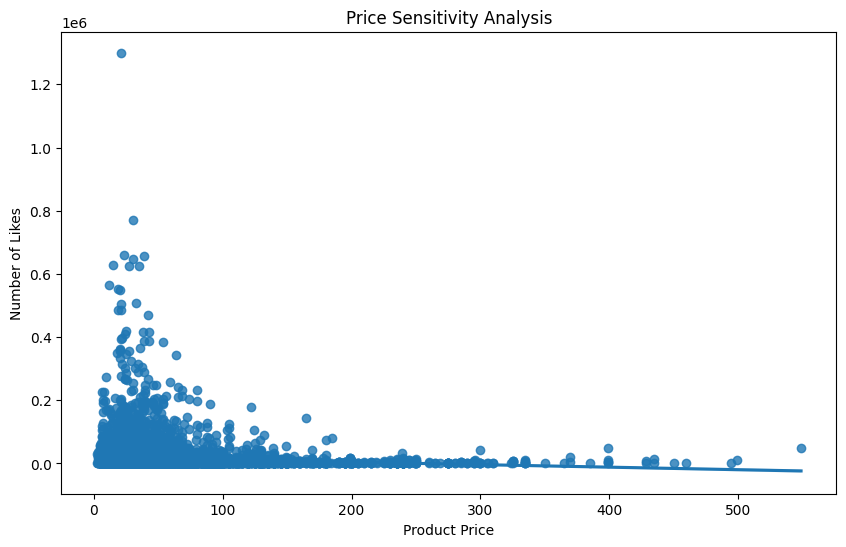

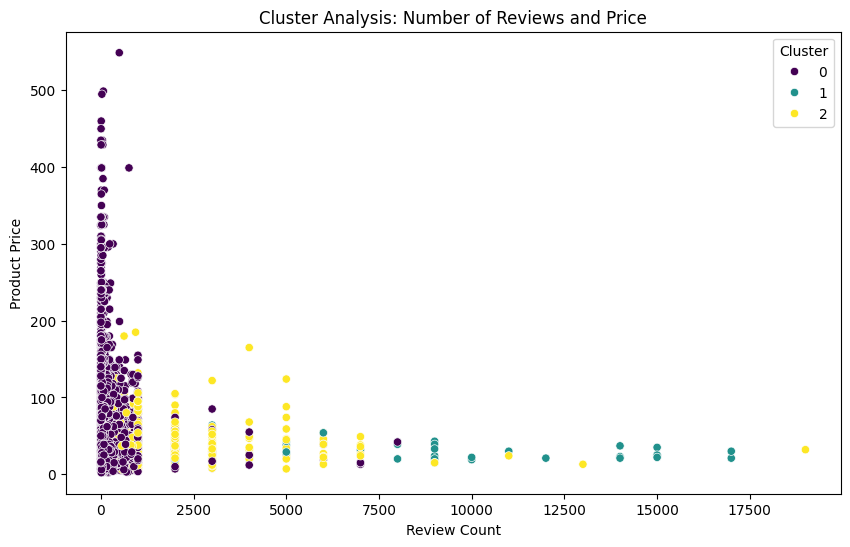

In [268]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Price', y='Number of people liked product', data=website)
plt.title('Price Sensitivity Analysis')
plt.xlabel('Product Price')
plt.ylabel('Number of Likes')
plt.show()

from sklearn.cluster import KMeans
X_segmentation = website[['Product Rating', 'Number of reviews', 'Number of people liked product', 'Price']]
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_segmentation)
website['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number of reviews', y='Price', hue='Cluster', data=website, palette='viridis')
plt.title('Cluster Analysis: Number of Reviews and Price')
plt.xlabel('Review Count')
plt.ylabel('Product Price')
plt.show()

### Product Diversity and Demand Analysis

In [269]:
import plotly.express as px

# Prepare data for the bar chart
bar_chart_data = website['Category of Product'].value_counts().reset_index()
bar_chart_data.columns = ['Category', 'Count']

# Define a custom color scale with shades of green, purple, and orange
custom_color_scale = px.colors.qualitative.Set1 + px.colors.qualitative.Plotly + px.colors.qualitative.Plotly

# Create an interactive bar chart with custom color scale
fig = px.bar(bar_chart_data, x='Category', y='Count', title='Popular Product Categories', 
             labels={'Category': 'Product Category', 'Count': 'Count'},
             color_discrete_sequence=custom_color_scale)
fig.update_layout(xaxis_title='Product Category', yaxis_title='Count')

# Show the chart
fig.show()

# Calculate the number of unique items in product categories for diversity assessment
variety = website.groupby('Category of Product')['Product Rating'].nunique().reset_index()
variety.columns = ['Category', 'Unique_Products_Count']
print("\nDiversity Assessment:\n", variety)



Diversity Assessment:
                      Category  Unique_Products_Count
0                 Accessories                      1
1              After Sun Care                      2
2                  Aftershave                      4
3                  Anti-Aging                      5
4               BB & CC Cream                      5
..                        ...                    ...
138                    Toners                      5
139  Tweezers & Eyebrow Tools                      5
140         Value & Gift Sets                      9
141                  Wellness                      1
142               no category                      5

[143 rows x 2 columns]


### Analysing Product Names and Marketing Strategies

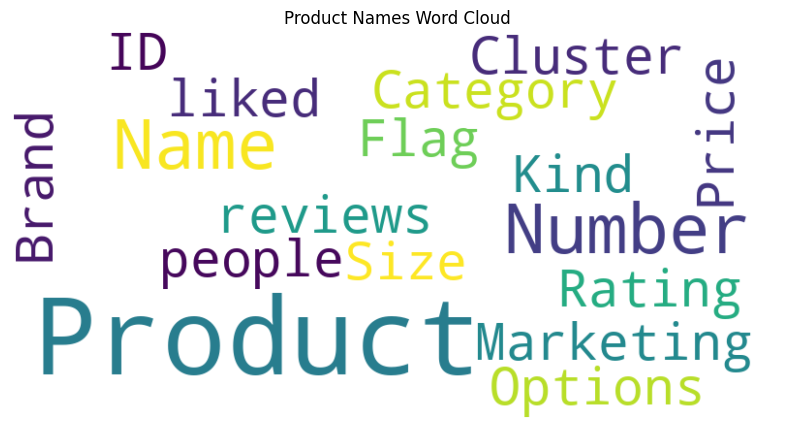

In [270]:
# Create a list or series of product names
product_names = website.columns.astype(str)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(' '.join(product_names))

# Visualise the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Product Names Word Cloud')
plt.show()

### Recommendations for Effective Marketing Strategies

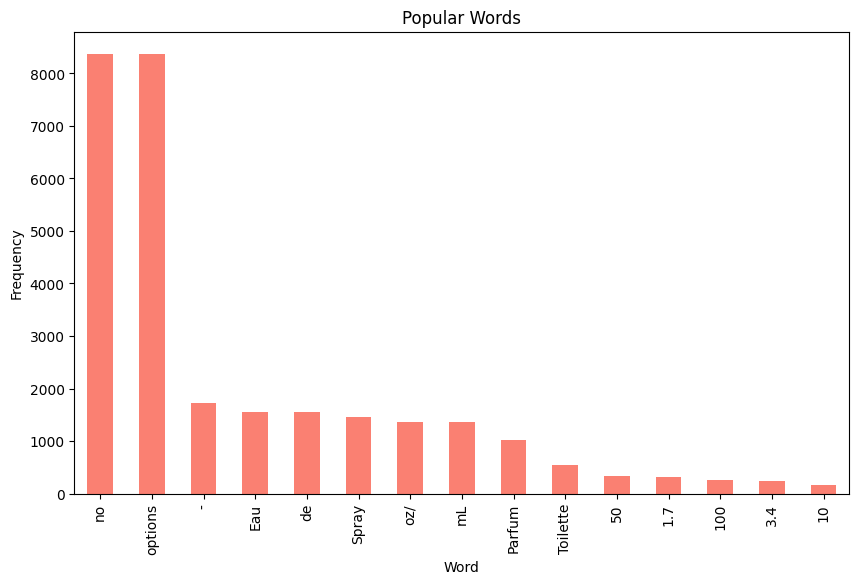

In [271]:
# Analyse popular words in product names to improve marketing strategies
top_words = website['Options of Products'].str.split(expand=True).stack().value_counts().head(15)
top_words.plot(kind='bar', color='salmon', figsize=(10, 6))
plt.title('Popular Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()